# Use Requests to Test Flask API

In [1]:
import json
import glob
import requests
from pathlib import Path

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cloud_detect.io

In [9]:
image_dir = Path("../tests/data/images")
images = list(image_dir.glob("*.jpg"))
images

[PosixPath('../tests/data/images/000000000872.jpg'),
 PosixPath('../tests/data/images/000000000632.jpg'),
 PosixPath('../tests/data/images/000000000785.jpg'),
 PosixPath('../tests/data/images/000000000724.jpg'),
 PosixPath('../tests/data/images/000000001268.jpg'),
 PosixPath('../tests/data/images/000000000802.jpg'),
 PosixPath('../tests/data/images/000000001000.jpg'),
 PosixPath('../tests/data/images/000000000776.jpg'),
 PosixPath('../tests/data/images/000000000285.jpg'),
 PosixPath('../tests/data/images/000000000139.jpg'),
 PosixPath('../tests/data/images/000000000885.jpg')]

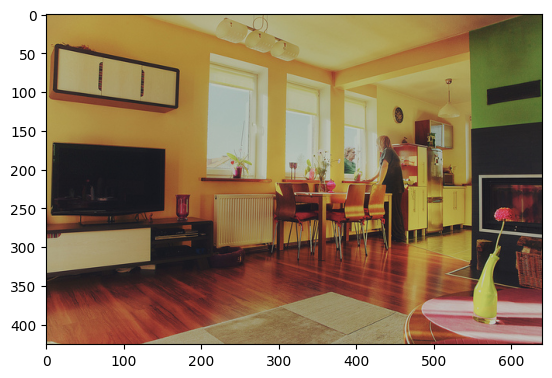

In [21]:
img_idx = 9
img_path = images[img_idx]

json_data = cloud_detect.io.image_file_to_json(img_path)
json_str = json.dumps(json_data)
uuid, img = cloud_detect.io.image_from_json(json_str)
cv2_img = cloud_detect.io.image_data_to_cv2_image(img)
plt_img = cloud_detect.io.cv2_image_to_plt_image(cv2_img)

plt.imshow(plt_img);

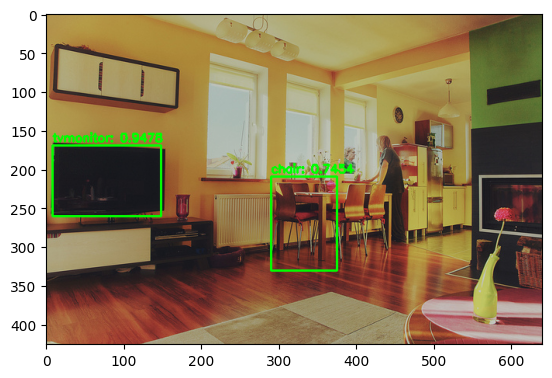

In [22]:
url = "http://localhost:5000/cloud-detect"
response = requests.post(url, json=json_data)
if response.status_code != 200:
    raise ValueError("Request failed")

response_data = json.loads(response.text)

if uuid != response_data["id"]:
    raise ValueError("UUIDs do not match")

objects = response_data["objects"]
if len(objects) > 0:
    for obj in objects:
        rect = obj["rectangle"]
        h, w, x, y = rect['height'], rect['width'], rect['left'], rect['top']
        text = "{}: {:.4f}".format(obj["label"], obj["accuracy"])
        color = (0, 255, 0)
        cv2.rectangle(cv2_img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(cv2_img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    plt_img = cloud_detect.io.cv2_image_to_plt_image(cv2_img)
    plt.imshow(plt_img);
else: 
    print("No objects detected")